In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import timeit
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'


In [3]:
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
               'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
               'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
               'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
               'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
               'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
               'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

canal_dict = {'KAI': 35,'KBG': 17,'KGU': 149,'KDE': 47,'KAJ': 41,'KCG': 59,
 'KHM': 12,'KAL': 74,'KFH': 140,'KCT': 112,'KBJ': 133,'KBL': 88,'KHQ': 157,'KFB': 146,'KFV': 48,'KFC': 4,
 'KCK': 52,'KAN': 110,'KES': 68,'KCB': 78,'KBS': 118,'KDP': 103,'KDD': 113,'KBX': 116,'KCM': 82,
 'KAE': 30,'KAB': 28,'KFG': 27,'KDA': 63,'KBV': 100,'KBD': 109,'KBW': 114,'KGN': 11,
 'KCP': 129,'KAK': 51,'KAR': 32,'KHK': 10,'KDS': 124,'KEY': 93,'KFU': 36,'KBY': 111,
 'KEK': 145,'KCX': 120,'KDQ': 80,'K00': 50,'KCC': 29,'KCN': 81,'KDZ': 99,'KDR': 56,
 'KBE': 119,'KFN': 42,'KEC': 66,'KDM': 130,'KBP': 121,'KAU': 142,'KDU': 79,
 'KCH': 84,'KHF': 19,'KCR': 153,'KBH': 90,'KEA': 89,'KEM': 155,'KGY': 44,'KBM': 135,
 'KEW': 98,'KDB': 117,'KHD': 2,'RED': 8,'KBN': 122,'KDY': 61,'KDI': 150,'KEU': 72,
 'KCA': 73,'KAH': 31,'KAO': 94,'KAZ': 7,'004': 83,'KEJ': 95,'KBQ': 62,'KEZ': 108,
 'KCI': 65,'KGW': 147,'KFJ': 33,'KCF': 105,'KFT': 92,'KED': 143,'KAT': 5,'KDL': 158,
 'KFA': 3,'KCO': 104,'KEO': 96,'KBZ': 67,'KHA': 22,'KDX': 69,'KDO': 60,'KAF': 23,'KAW': 76,
 'KAG': 26,'KAM': 107,'KEL': 125,'KEH': 15,'KAQ': 37,'KFD': 25,'KEQ': 138,'KEN': 137,
 'KFS': 38,'KBB': 131,'KCE': 86,'KAP': 46,'KAC': 57,'KBO': 64,'KHR': 161,'KFF': 45,
 'KEE': 152,'KHL': 0,'007': 71,'KDG': 126,'025': 159,'KGX': 24,'KEI': 97,'KBF': 102,
 'KEG': 136,'KFP': 40,'KDF': 127,'KCJ': 156,'KFR': 144,'KDW': 132,-1: 6,'KAD': 16,
 'KBU': 55,'KCU': 115,'KAA': 39,'KEF': 128,'KAY': 54,'KGC': 18,'KAV': 139,'KDN': 151,
 'KCV': 106,'KCL': 53,'013': 49,'KDV': 91,'KFE': 148,'KCQ': 154,'KDH': 14,'KHN': 21,
 'KDT': 58,'KBR': 101,'KEB': 123,'KAS': 70,'KCD': 85,'KFL': 34,'KCS': 77,'KHO': 13,
 'KEV': 87,'KHE': 1,'KHC': 9,'KFK': 20,'KDC': 75,'KFM': 141,'KHP': 160,'KHS': 162,
 'KFI': 134,'KGV': 43}


pais_dict = {'LV': 102,'CA': 2,'GB': 9,'EC': 19,'BY': 64,'ML': 104,'MT': 118,
 'LU': 59,'GR': 39,'NI': 33,'BZ': 113,'QA': 58,'DE': 10,'AU': 63,'IN': 31,
 'GN': 98,'KE': 65,'HN': 22,'JM': 116,'SV': 53,'TH': 79,'IE': 5,'TN': 85,
 'PH': 91,'ET': 54,'AR': 13,'KR': 87,'GA': 45,'FR': 8,'SG': 66,'LB': 81,
 'MA': 38,'NZ': 93,'SK': 69,'CN': 28,'GI': 96,'PY': 51,'SA': 56,'PL': 30,
 'PE': 20,'GE': 78,'HR': 67,'CD': 112,'MM': 94,'MR': 48,'NG': 83,'HU': 106,
 'AO': 71,'NL': 7,'GM': 110,'DJ': 115,'ZA': 75,'OM': 100,'LT': 103,'MZ': 27,
 'VE': 14,'EE': 52,'CF': 109,'CL': 4,'SL': 97,'DO': 11,'PT': 26,'ES': 0,
 'CZ': 36,'AD': 35,'RO': 41,'TW': 29,'BA': 61,'IS': 107,'AT': 6,'ZW': 114,
 'TR': 70,'CO': 21,'PK': 84,'SE': 24,'AL': 25,'CU': 72,'UY': 77,'EG': 74,'CR': 32,
 'GQ': 73,'MK': 105,'KW': 92,'GT': 44,'CM': 55,'SN': 47,'KZ': 111,'DK': 76,
 'LY': 108,'AE': 37,'PA': 60,'UA': 49,'GW': 99,'TG': 86,'MX': 16,'KH': 95,
 'FI': 23,'NO': 46,'IT': 18,'GH': 88, 'JP': 82,'RU': 43,'PR': 40,'RS': 89,
 'DZ': 80,'MD': 68,-1: 1,'BG': 50,'CI': 57,'IL': 42,'VN': 90,'CH': 3,'US': 15,'HK': 34,
 'CG': 101,'BO': 62,'BR': 17,'BE': 12,'BM': 117}

emp_dict = {'N':0,-1:-1,'A':1,'B':2,'F':3,'S':4}
indfall_dict = {'N':0,-1:-1,'S':1}
sexo_dict = {'V':0,'H':1,-1:-1}
tiprel_dict = {'A':0,-1:-1,'I':1,'P':2,'N':3,'R':4}
indresi_dict = {'N':0,-1:-1,'S':1}
indext_dict = {'N':0,-1:-1,'S':1}
conyuemp_dict = {'N':0,-1:-1,'S':1}
segmento_dict = {-1:-1,'01 - TOP':1,'02 - PARTICULARES':2,'03 - UNIVERSITARIO':3}

In [6]:
tic=timeit.default_timer()
def resize_data(DF,is_DF=True):
    DF.replace(' NA', -2, inplace=True)
    DF.replace('         NA', -2, inplace=True)
    DF.fillna(-1, inplace=True)

    DF['ncodpers'] = DF['ncodpers'].astype(np.int32)
    DF['renta'] = DF['renta'].astype(np.float32)
    DF['indrel'] = DF['indrel'].map(lambda x: 2 if x == 99 else x).astype(np.int8)

    DF['ind_empleado'] = DF['ind_empleado'].map(lambda x: emp_dict[x]).astype(np.int8)

    DF['sexo'] = DF['sexo'].map(lambda x: sexo_dict[x]).astype(np.int8)
    DF['age'] = DF['age'].astype(np.int16)
    DF['ind_nuevo'] = DF['ind_nuevo'].astype(np.int8)
    DF['antiguedad'] = DF['antiguedad'].map(lambda x: -1 if x == '     NA' else x).astype(int)
    DF['antiguedad'] = DF['antiguedad'].map(lambda x: -2 if x == -999999 else x).astype(np.int16)
    DF['indrel_1mes'] = DF['indrel_1mes'].map(lambda x: -2 if x == 'P' else x).astype(np.float16)
    DF['indrel_1mes'] = DF['indrel_1mes'].astype(np.int8)

    DF['tiprel_1mes'] = DF['tiprel_1mes'].map(lambda x: tiprel_dict[x]).astype(np.int8)

    DF['indresi'] = DF['indresi'].map(lambda x: indresi_dict[x]).astype(np.int8)

    DF['indext'] = DF['indext'].map(lambda x: indext_dict[x]).astype(np.int8)

    DF['conyuemp'] = DF['conyuemp'].map(lambda x: conyuemp_dict[x]).astype(np.int8)

    DF['canal_entrada'] = DF['canal_entrada'].map(lambda x: canal_dict[x]).astype(np.int16)


    DF['indfall'] = DF['indfall'].map(lambda x: indfall_dict[x]).astype(np.int8)

    DF['pais_residencia'] = DF['pais_residencia'].map(lambda x: pais_dict[x]).astype(np.int8)

    DF['tipodom'] = DF['tipodom'].astype(np.int8)

    DF['cod_prov'] = DF['cod_prov'].astype(np.int8)

    DF.drop('nomprov',axis=1,inplace=True)

    DF['ind_actividad_cliente'] = DF['ind_actividad_cliente'].astype(np.int8)

    DF['fecha_dato_month'] = DF['fecha_dato'].map(lambda x: int(x[5:7])).astype(np.int8)
    DF['fecha_dato_year'] = DF['fecha_dato'].map(lambda x: int(x[0:4]) - 2015).astype(np.int8)
    DF['month_int'] = (DF['fecha_dato_month'] + 12 * DF['fecha_dato_year']).astype(np.int8)
    DF.drop('fecha_dato',axis=1,inplace=True)

    DF['fecha_alta'] = DF['fecha_alta'].map(lambda x: '2020-00-00' if x == -1 else x)
    DF['fecha_alta_month'] = DF['fecha_alta'].map(lambda x: int(x[5:7])).astype(np.int8)
    DF['fecha_alta_year'] = DF['fecha_alta'].map(lambda x: int(x[0:4]) - 2015).astype(np.int8)
    DF['fecha_alta_day'] = DF['fecha_alta'].map(lambda x: int(x[8:10])).astype(np.int8)
    DF['fecha_alta_month_int'] = (DF['fecha_alta_month'] + 12 * DF['fecha_alta_year']).astype(np.int8)
    DF.drop('fecha_alta',axis=1,inplace=True)
    DF['ult_fec_cli_1t'] = DF['ult_fec_cli_1t'].map(lambda x: '2020-00-00' if x == -1 else x)
    DF['ult_fec_cli_1t_month'] = DF['ult_fec_cli_1t'].map(lambda x: int(x[5:7])).astype(np.int8)
    DF['ult_fec_cli_1t_year'] = DF['ult_fec_cli_1t'].map(lambda x: int(x[0:4]) - 2015).astype(np.int8)
    DF['ult_fec_cli_1t_day'] = DF['ult_fec_cli_1t'].map(lambda x: int(x[8:10])).astype(np.int8)
    DF['ult_fec_cli_1t_month_int'] = (DF['ult_fec_cli_1t_month'] + 12 * DF['ult_fec_cli_1t_year']).astype(np.int8)
    DF.drop('ult_fec_cli_1t',axis=1,inplace=True)

    DF['segmento'] = DF['segmento'].map(lambda x: segmento_dict[x]).astype(np.int8)

    for col in target_cols:
        if is_DF:
            DF[col] = DF[col].astype(np.int8)

    return DF

In [7]:
reader = pd.read_csv(r"C:\Users\minec\Desktop\santander-product-recommendation\train_ver2.csv\train_ver2.csv", chunksize=100000, header=0)
train = pd.concat([resize_data(chunk) for chunk in reader])

reader_2 = pd.read_csv(r"C:\Users\minec\Desktop\santander-product-recommendation\test_ver2.csv\test_ver2.csv", chunksize=10000, header=0)
test = pd.concat([resize_data(chunk,is_DF=False) for chunk in reader_2])

train.info(memory_usage=True)


toc=timeit.default_timer()
print('Load Time',toc - tic)


#train.to_csv('train_encoded.csv', index=False)
#test.to_csv('test_encoded.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 55 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ncodpers                  int32  
 1   ind_empleado              int8   
 2   pais_residencia           int8   
 3   sexo                      int8   
 4   age                       int16  
 5   ind_nuevo                 int8   
 6   antiguedad                int16  
 7   indrel                    int8   
 8   indrel_1mes               int8   
 9   tiprel_1mes               int8   
 10  indresi                   int8   
 11  indext                    int8   
 12  conyuemp                  int8   
 13  canal_entrada             int16  
 14  indfall                   int8   
 15  tipodom                   int8   
 16  cod_prov                  int8   
 17  ind_actividad_cliente     int8   
 18  renta                     float32
 19  segmento                  int8   
 20  ind_ahor_fin_ult1     

In [8]:
test.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ncodpers                  929615 non-null  int32  
 1   ind_empleado              929615 non-null  int8   
 2   pais_residencia           929615 non-null  int8   
 3   sexo                      929615 non-null  int8   
 4   age                       929615 non-null  int16  
 5   ind_nuevo                 929615 non-null  int8   
 6   antiguedad                929615 non-null  int16  
 7   indrel                    929615 non-null  int8   
 8   indrel_1mes               929615 non-null  int8   
 9   tiprel_1mes               929615 non-null  int8   
 10  indresi                   929615 non-null  int8   
 11  indext                    929615 non-null  int8   
 12  conyuemp                  929615 non-null  int8   
 13  canal_entrada             929615 non-null  i

In [7]:
train

,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,...,fecha_dato_year,month_int,fecha_alta_month,fecha_alta_year,fecha_alta_day,fecha_alta_month_int,ult_fec_cli_1t_month,ult_fec_cli_1t_year,ult_fec_cli_1t_day,ult_fec_cli_1t_month_int
0,1375586,0,0,1,35,0,6,1,1,0,...,0,1,1,0,12,1,0,5,0,60
1,1050611,0,0,0,23,0,35,1,1,1,...,0,1,8,-3,10,-28,0,5,0,60
2,1050612,0,0,0,23,0,35,1,1,1,...,0,1,8,-3,10,-28,0,5,0,60
3,1050613,0,0,1,22,0,35,1,1,1,...,0,1,8,-3,10,-28,0,5,0,60
4,1050614,0,0,0,23,0,35,1,1,0,...,0,1,8,-3,10,-28,0,5,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,1166765,0,0,0,22,0,33,1,1,1,...,1,17,8,-2,14,-16,0,5,0,60
13647305,1166764,0,0,0,23,0,33,1,1,1,...,1,17,8,-2,14,-16,0,5,0,60
13647306,1166763,0,0,1,47,0,33,1,1,0,...,1,17,8,-2,14,-16,0,5,0,60
13647307,1166789,0,0,1,22,0,33,1,1,1,...,1,17,8,-2,14,-16,0,5,0,60


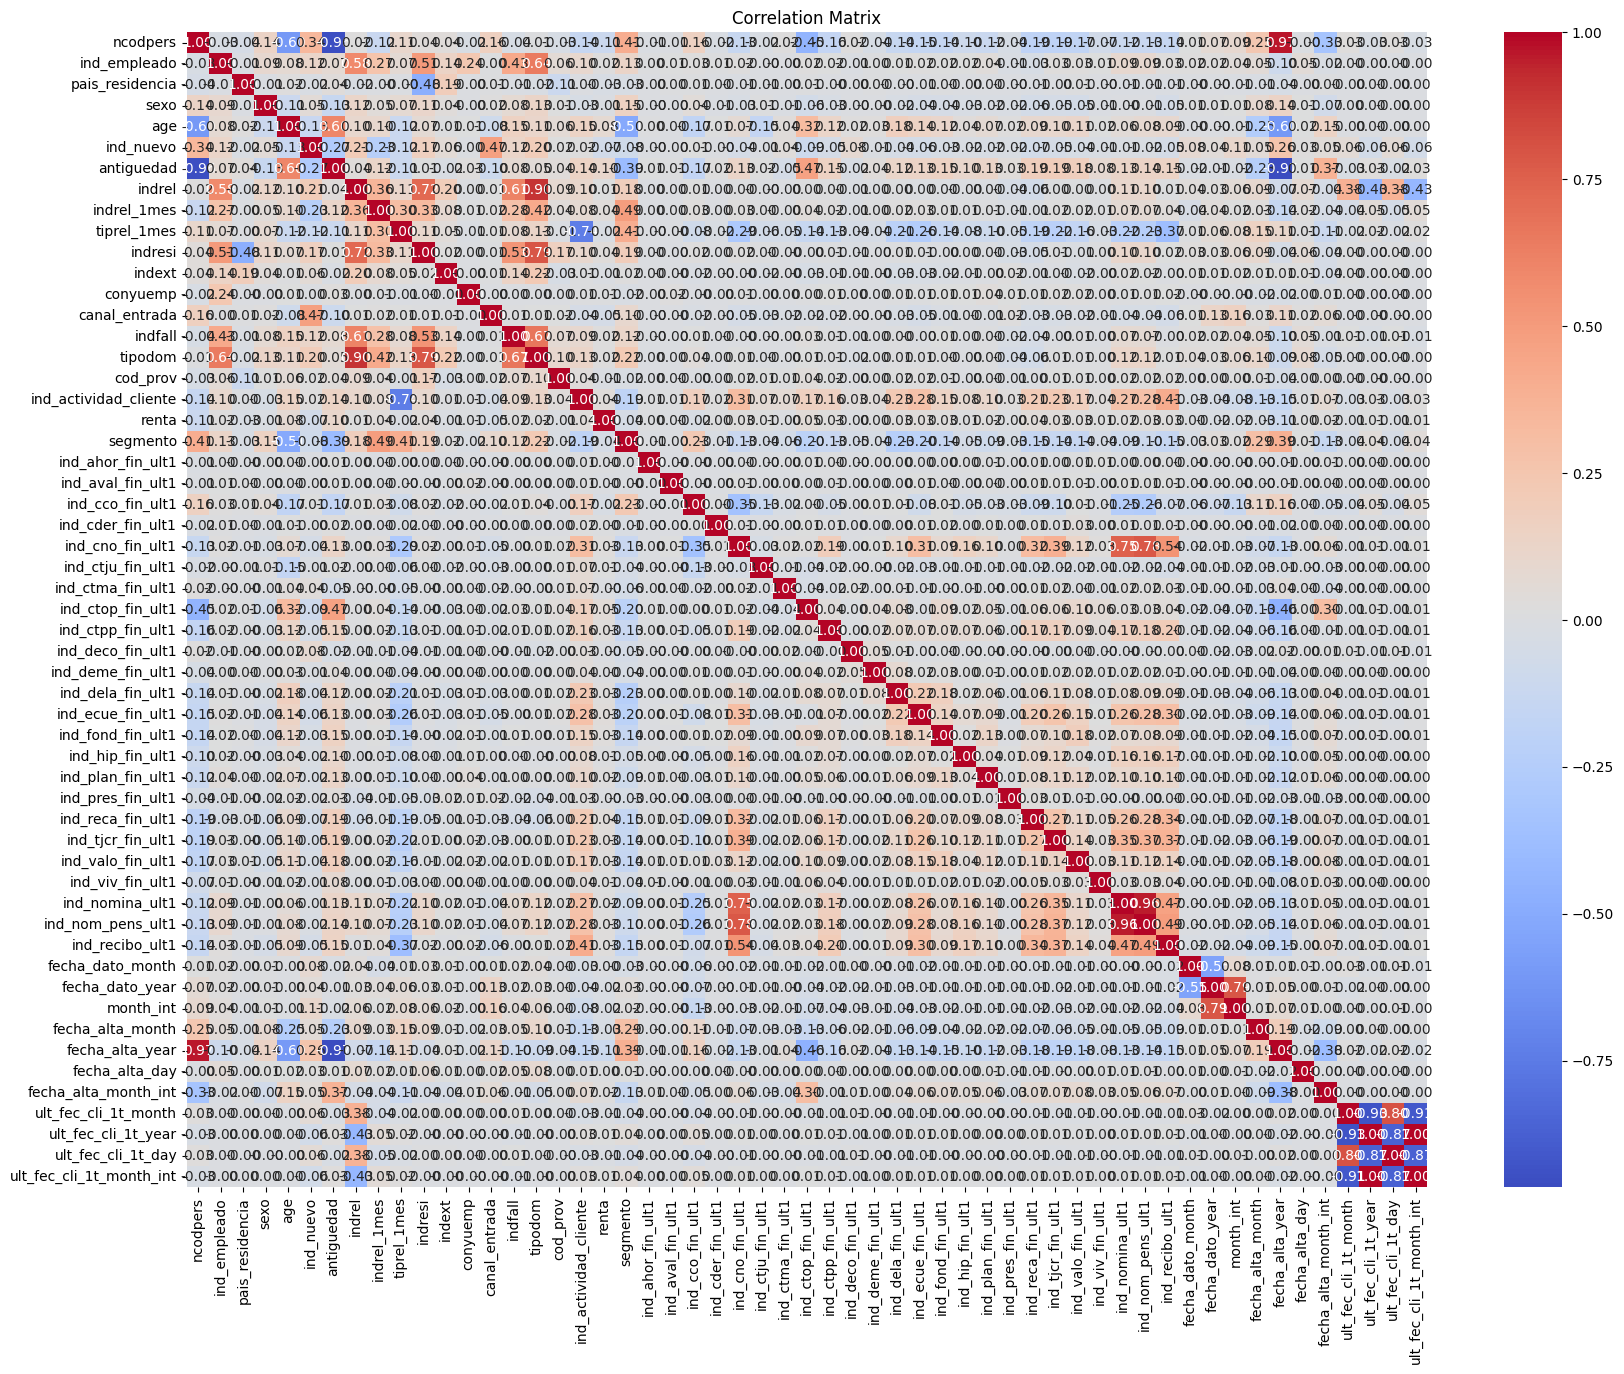

In [ ]:

correlation_matrix = train.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
X = train.drop(target_cols, axis=1)
y = train[target_cols]  


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

y[y == -1] = 0 



model = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))


model.fit(X, y)



MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [14]:
print(np.unique(y))


[-1  0  1]


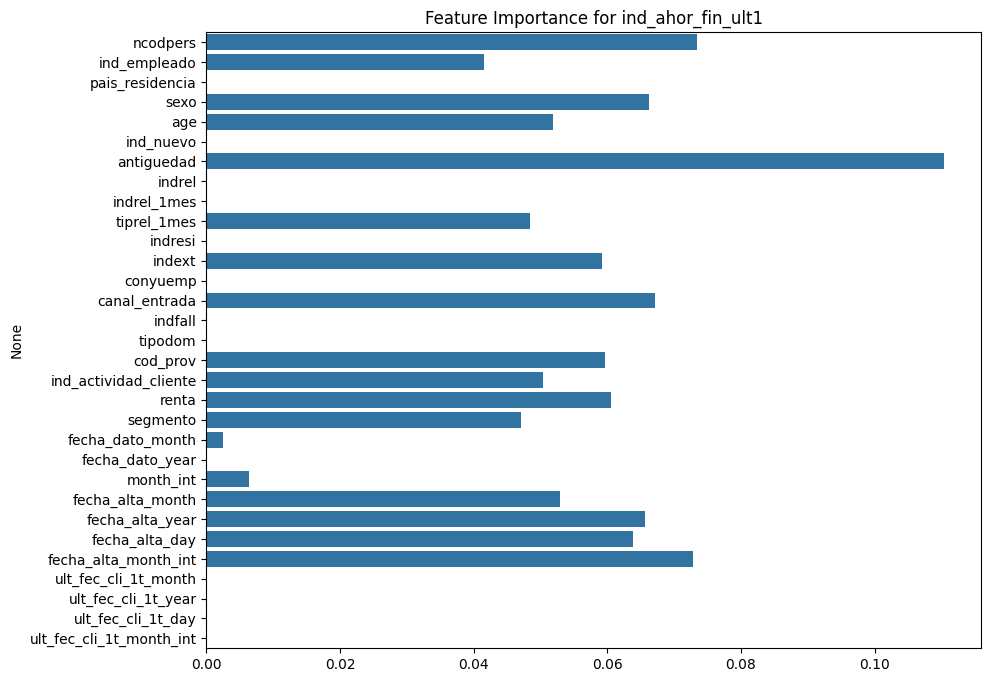

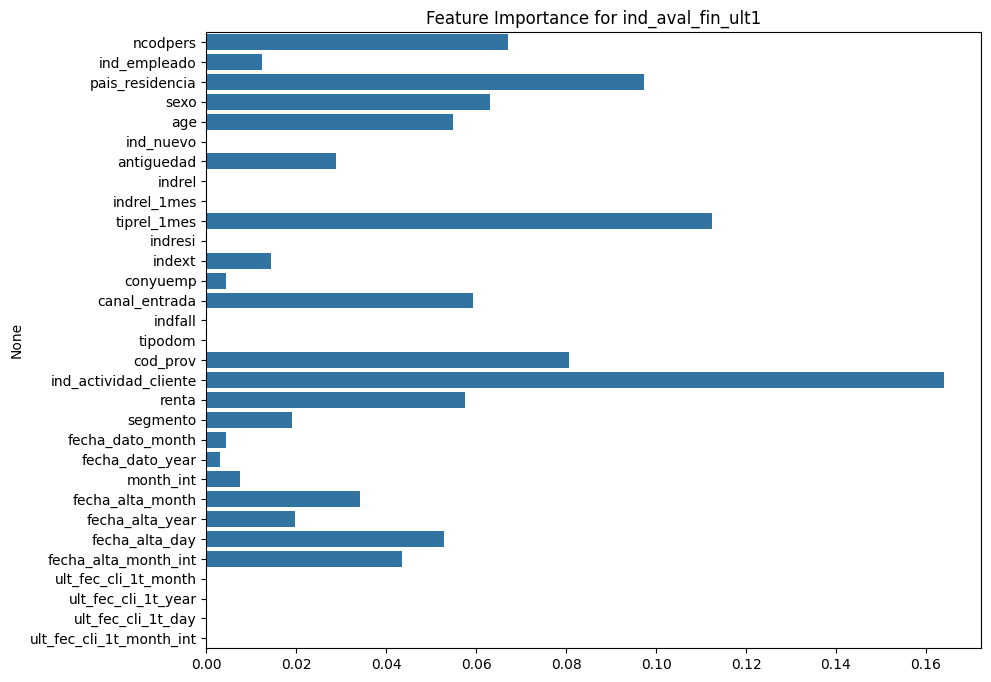

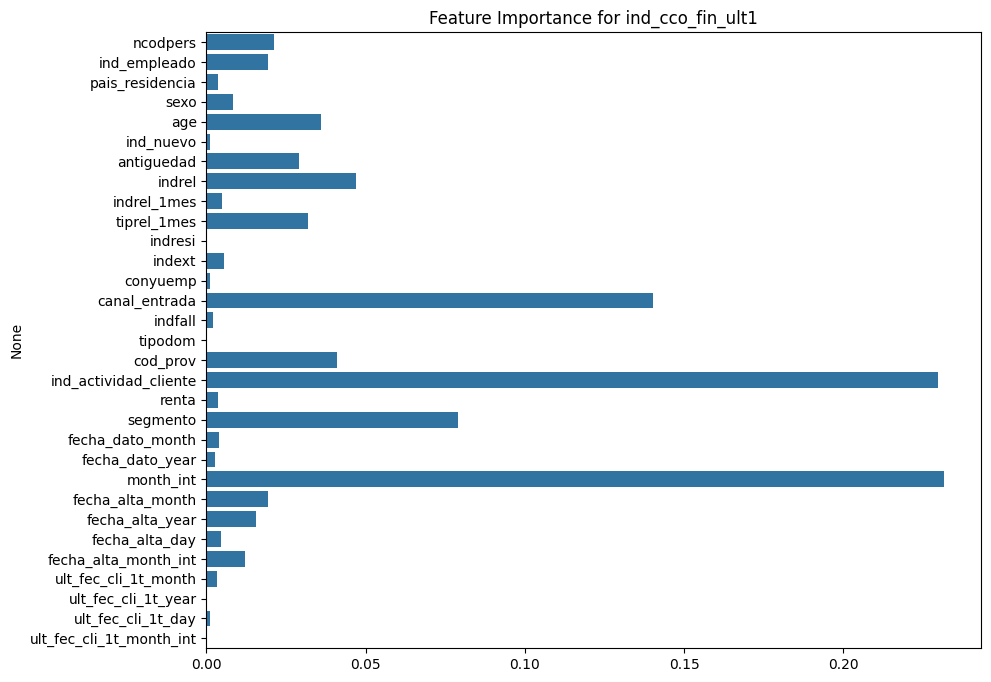

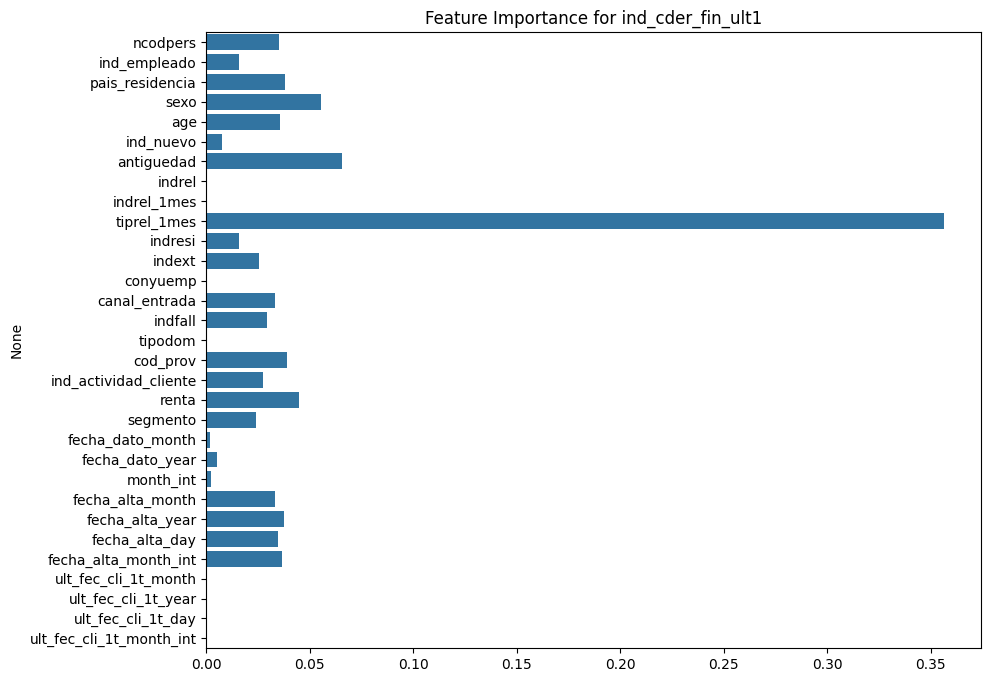

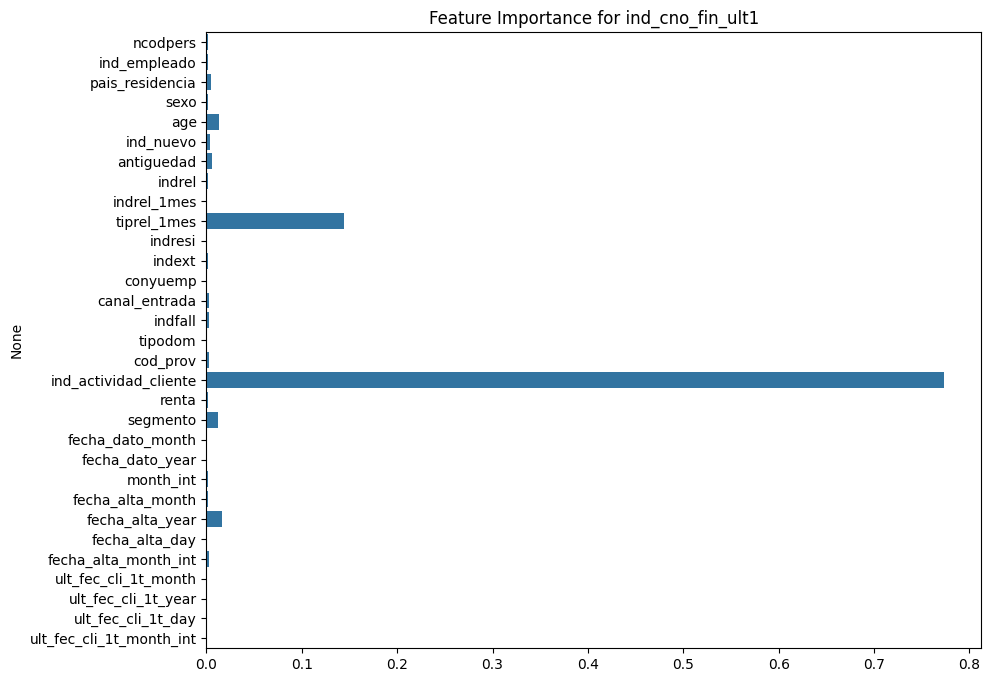

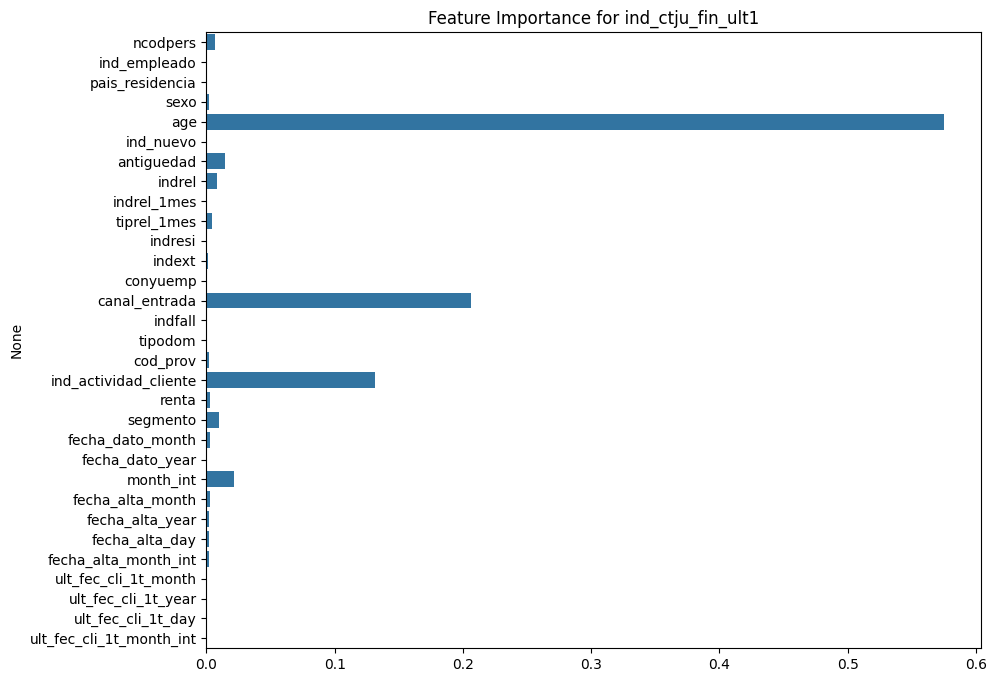

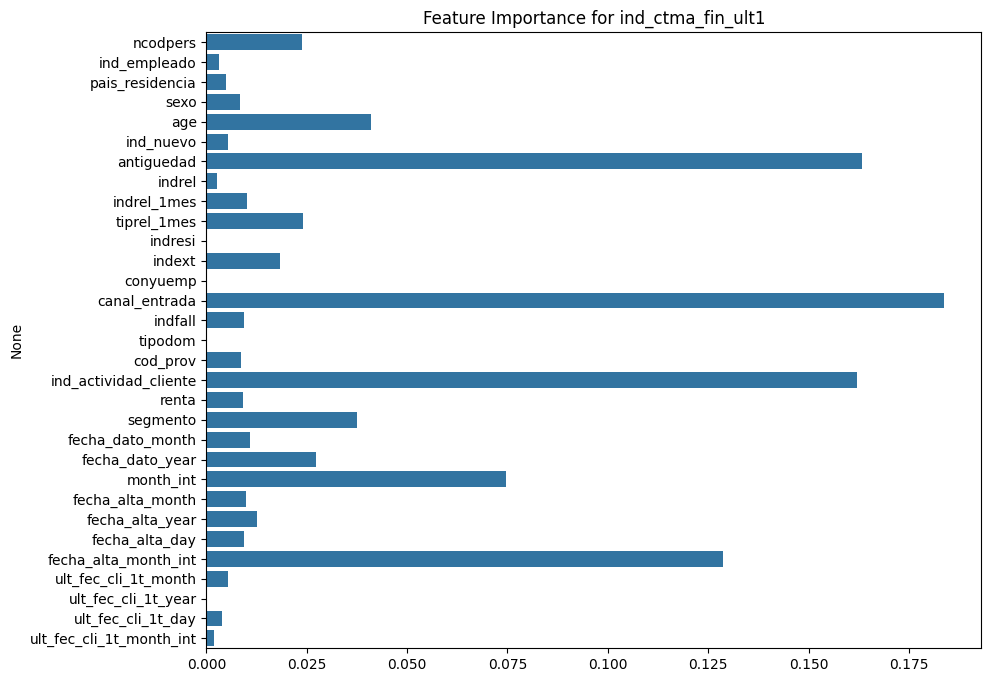

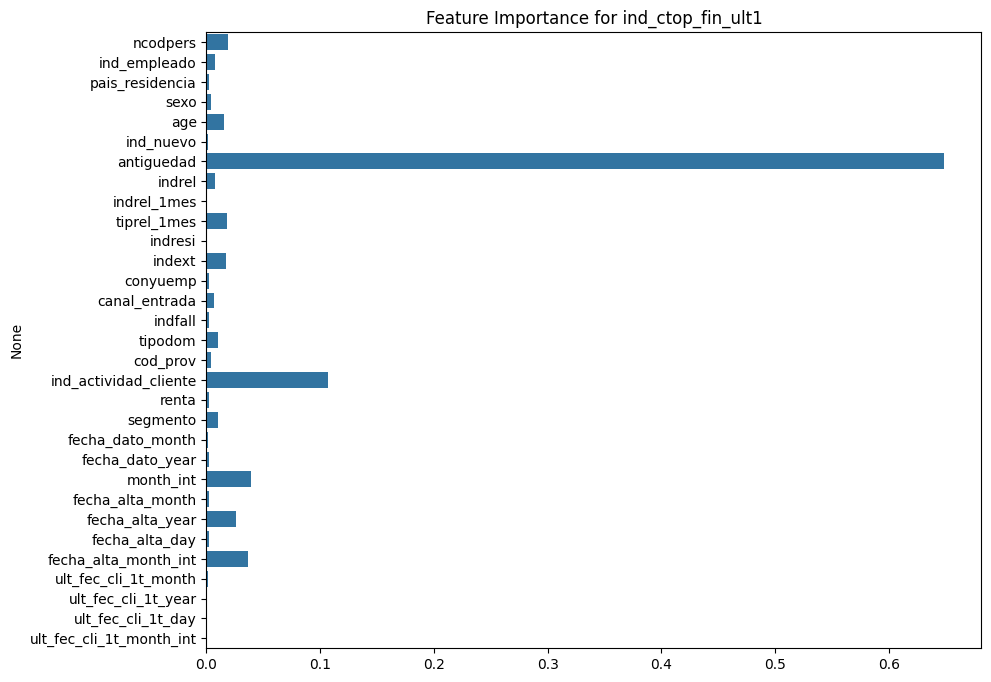

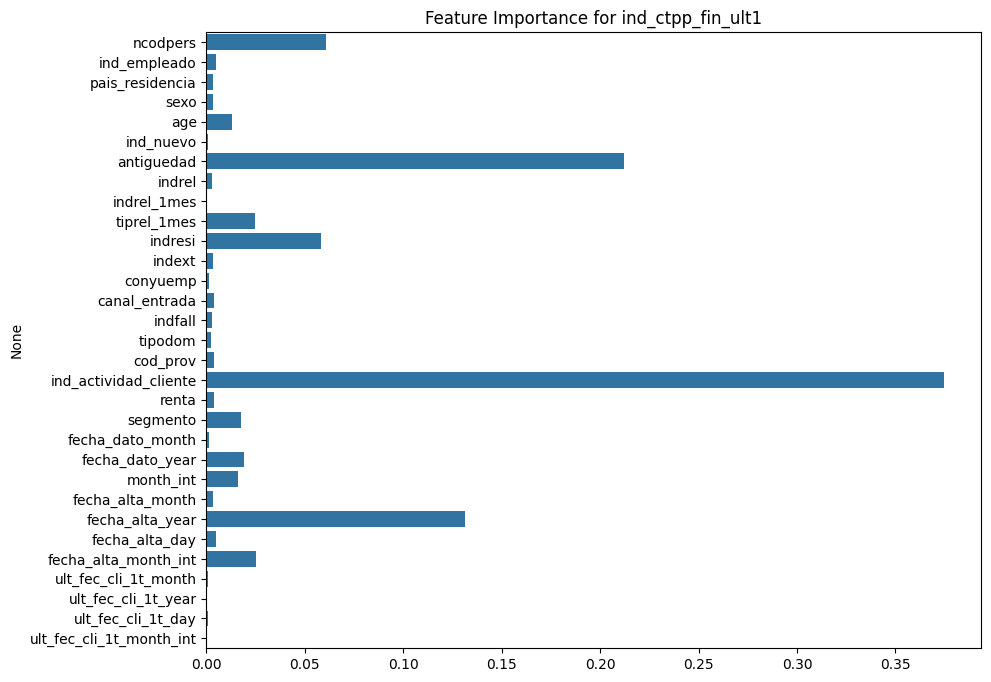

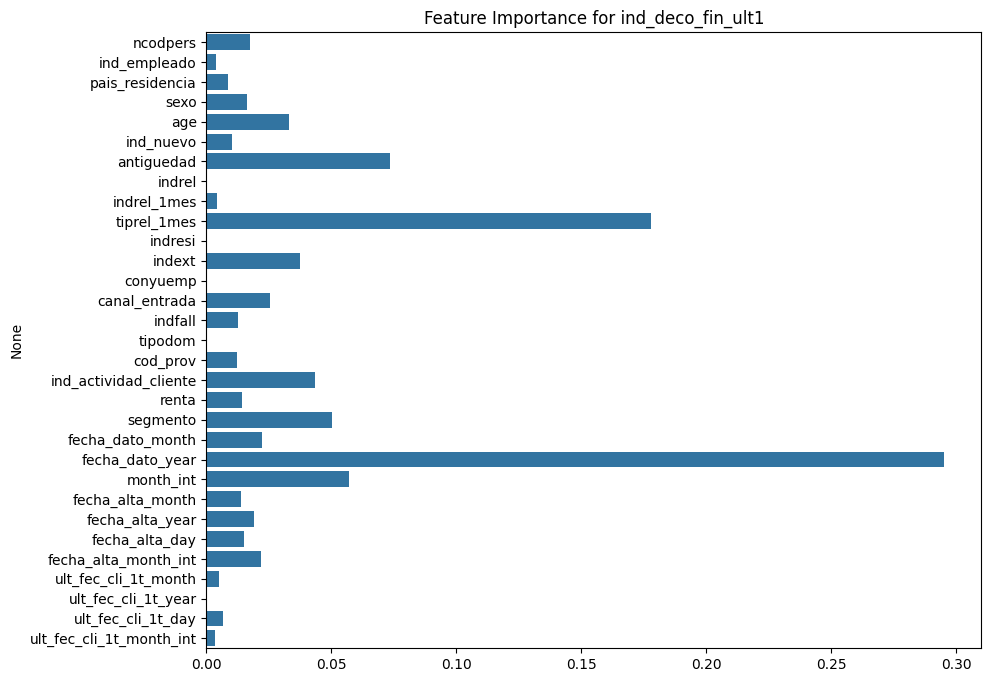

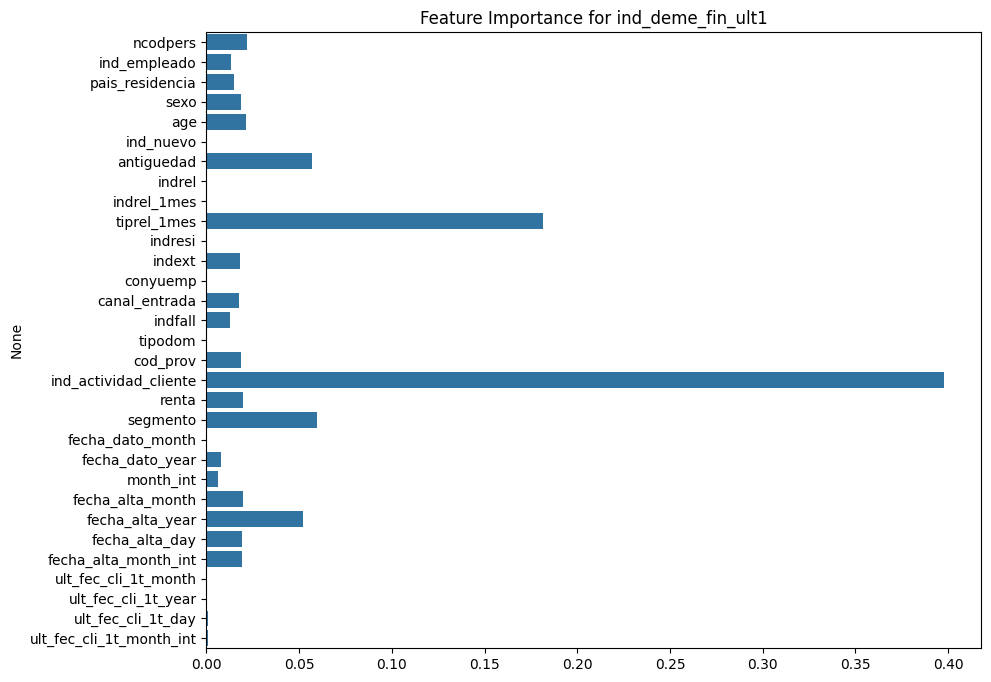

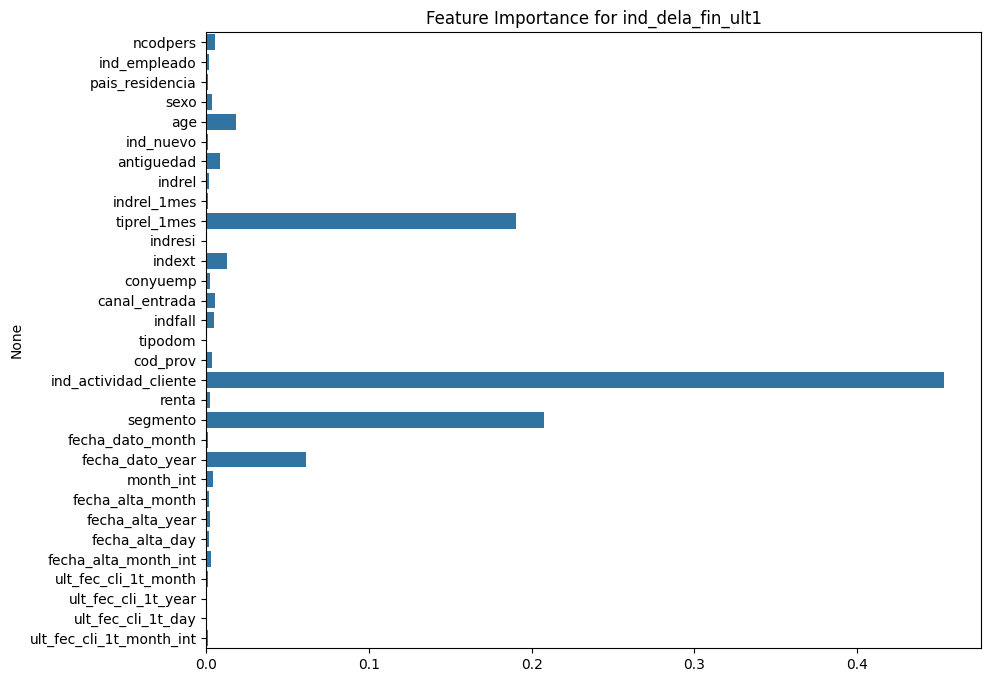

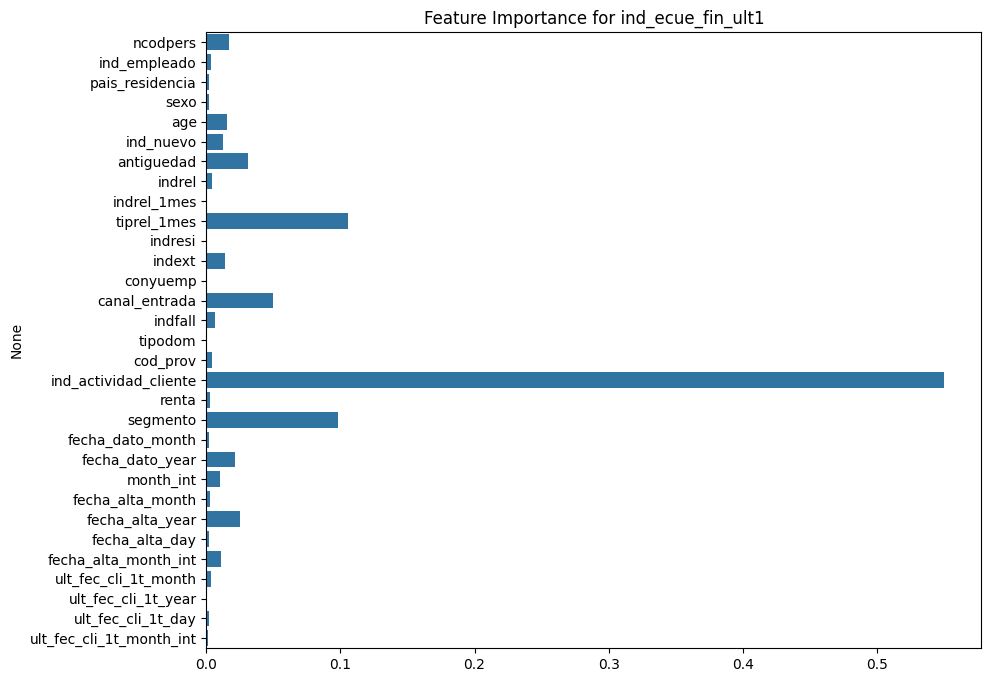

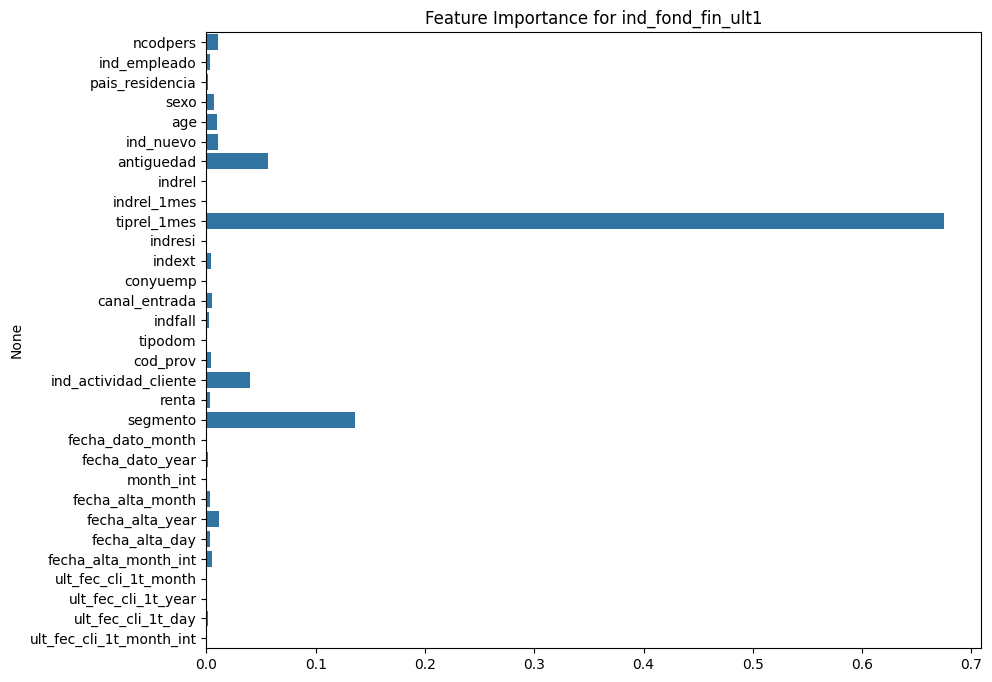

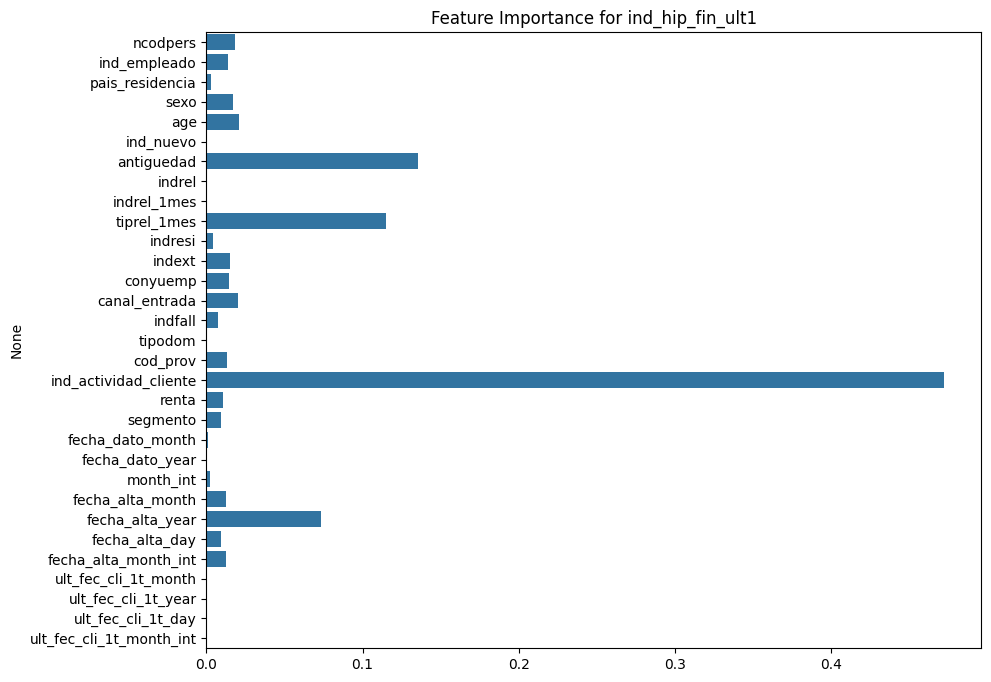

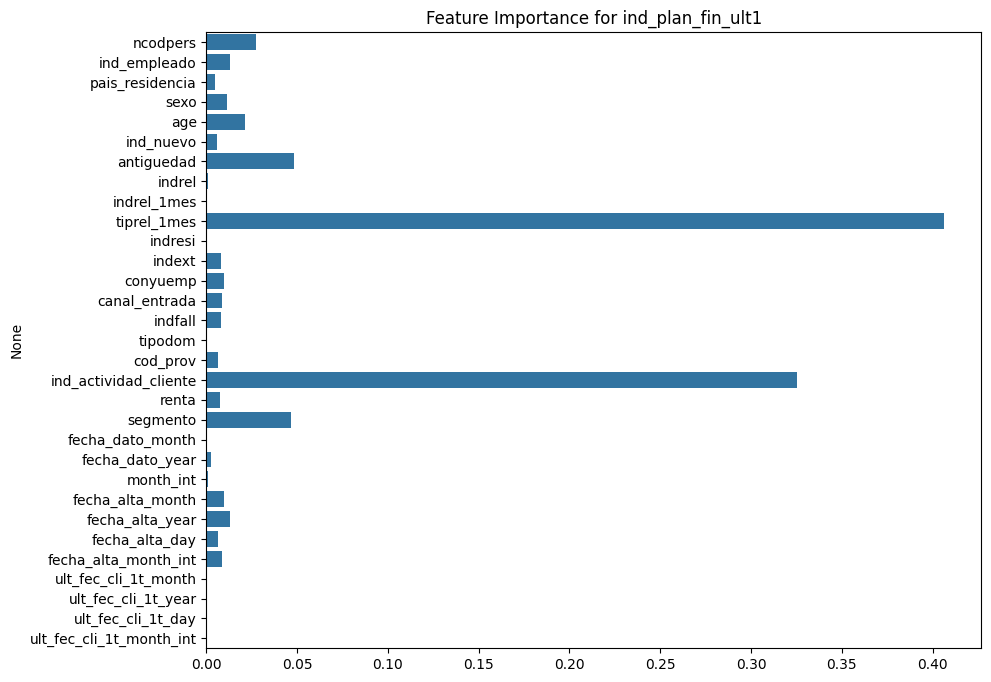

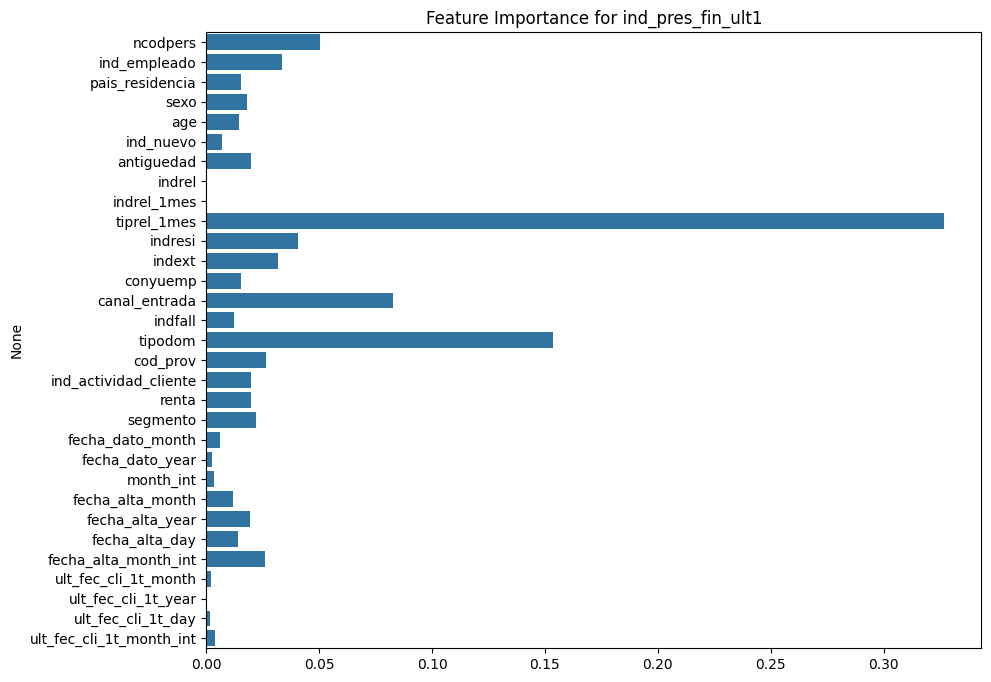

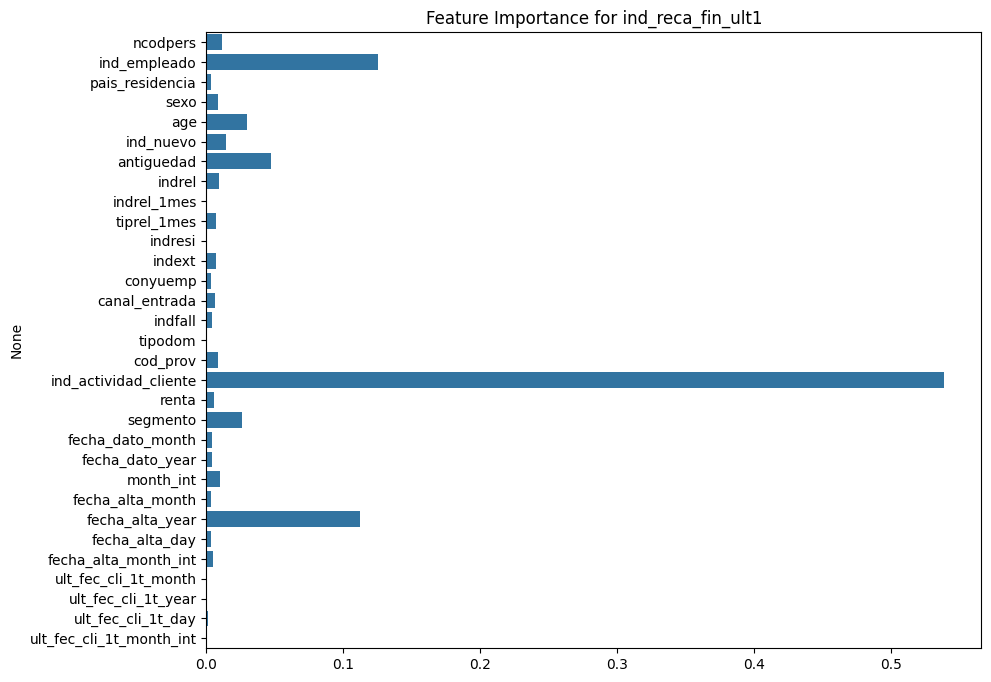

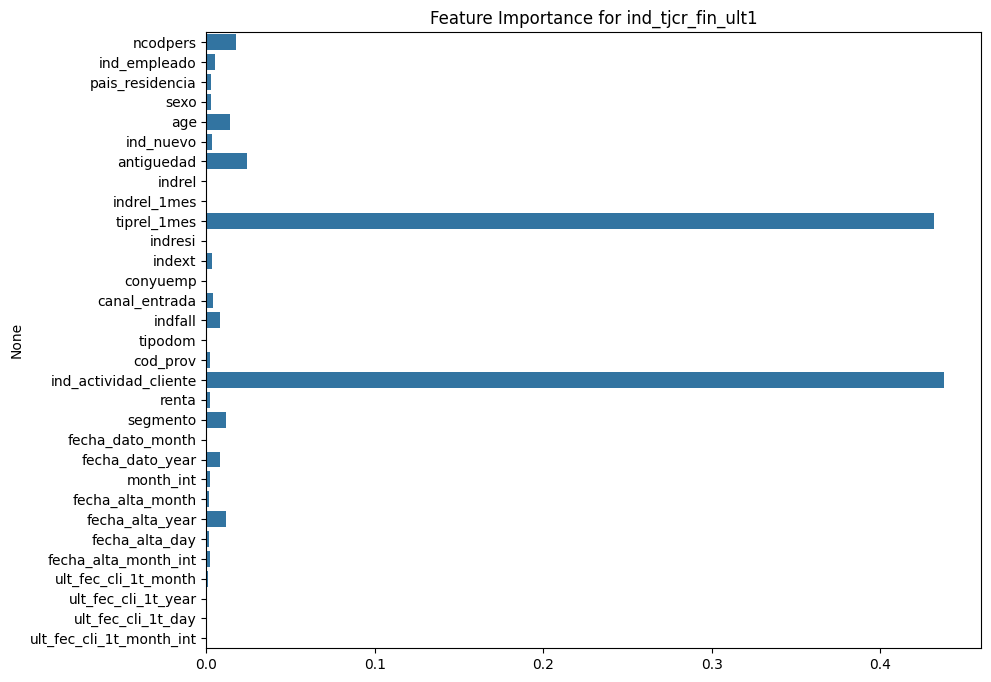

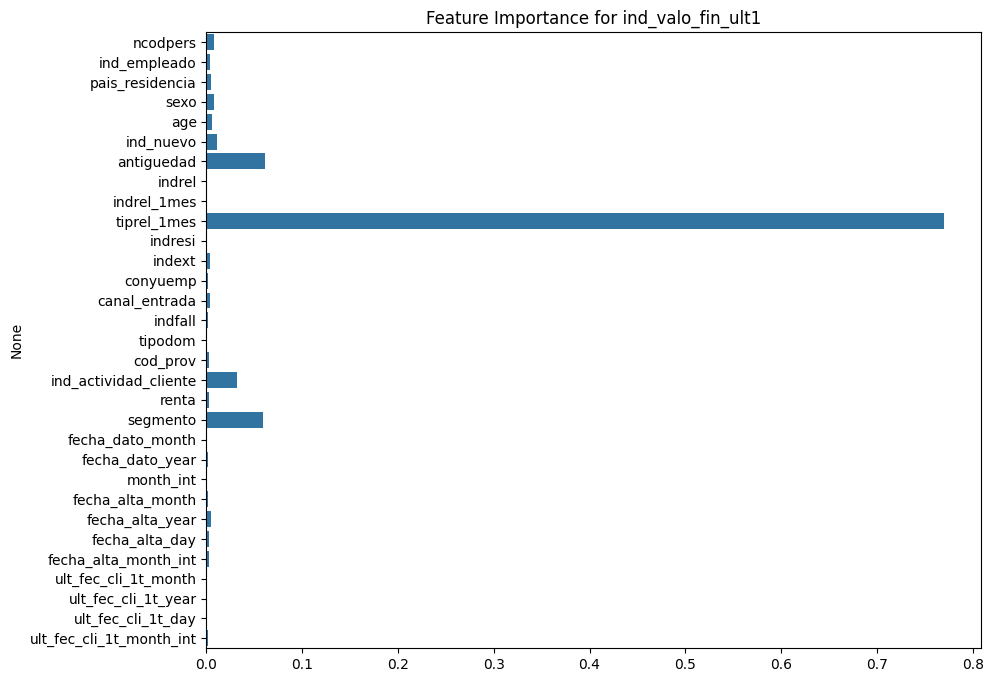

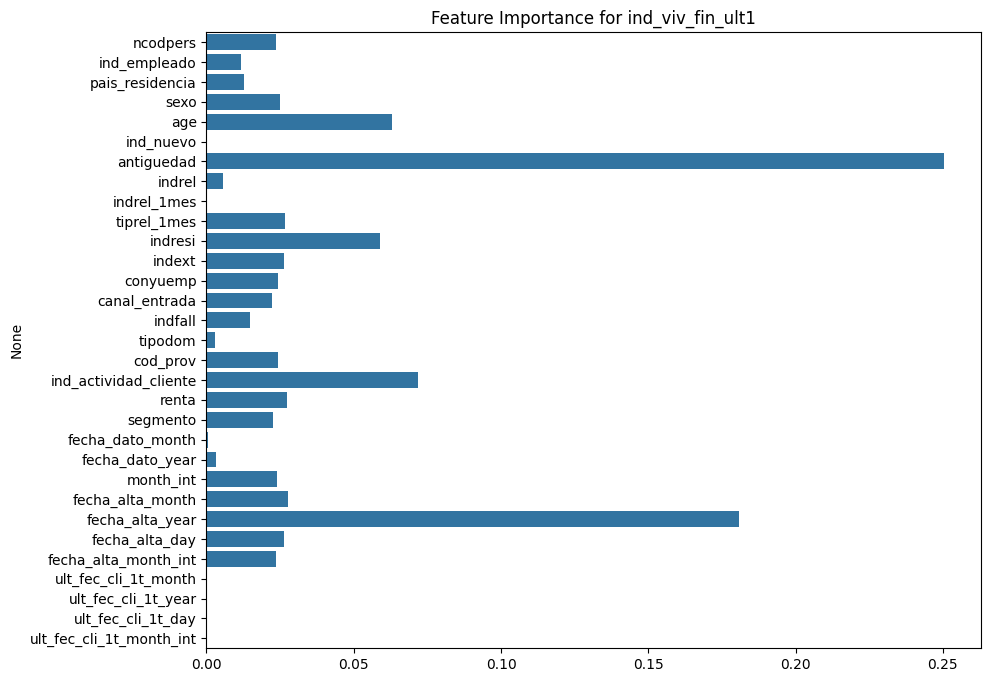

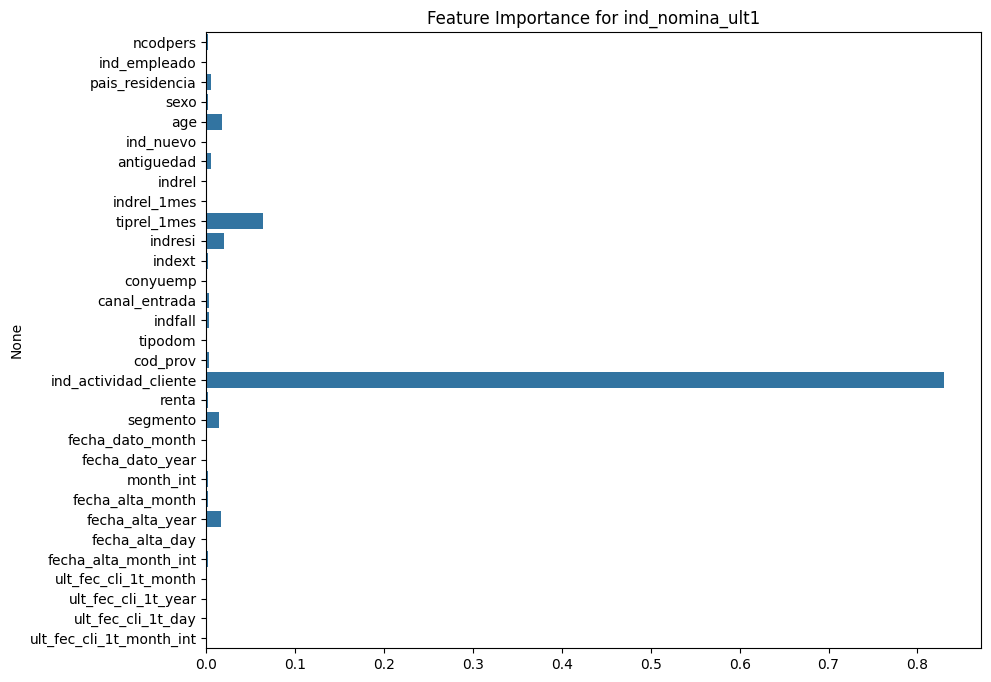

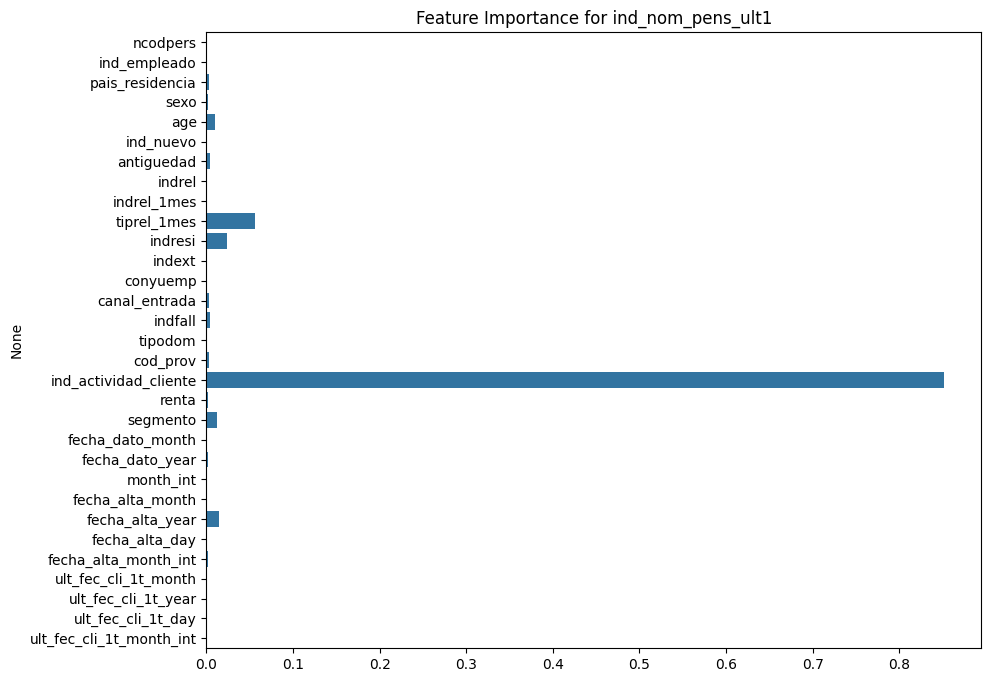

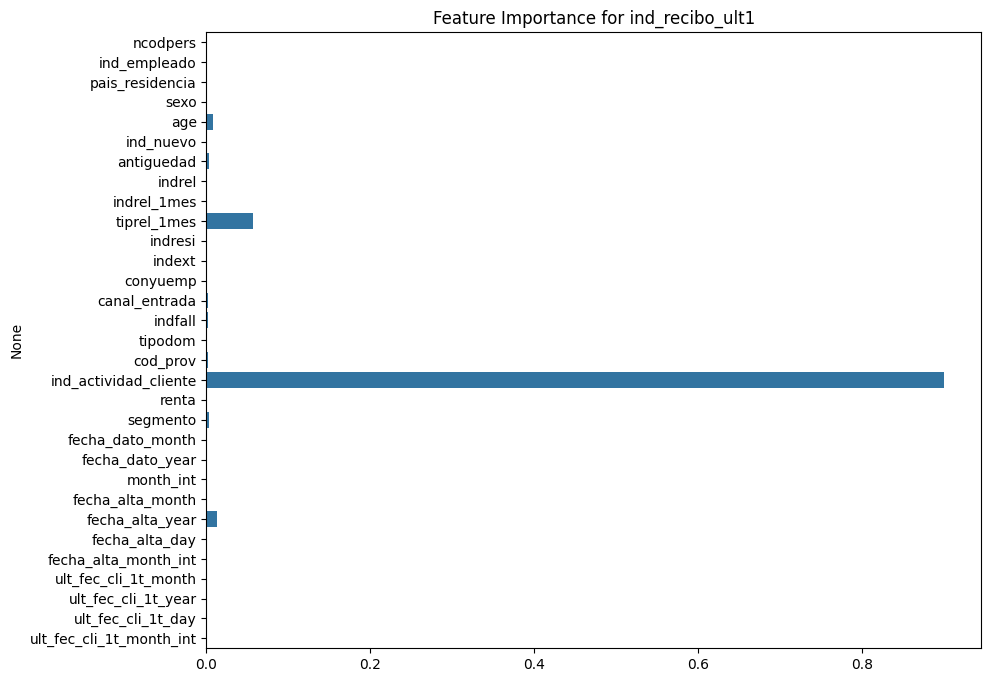

In [ ]:
for i, target in enumerate(target_cols):
    importance = model.estimators_[i].feature_importances_


    plt.figure(figsize=(10, 8))
    sns.barplot(x=importance, y=X.columns)
    plt.title(f'Feature Importance for {target}')
    plt.show()


In [ ]:

feature_importances = {}

for i, target in enumerate(target_cols):
    importances = model.estimators_[i].feature_importances_
    feature_importances[target] = importances

feature_importances_df = pd.DataFrame(feature_importances, index=X.columns)
feature_importances_df


,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ncodpers,0.073360,0.066999,0.021219,0.035306,0.001658,0.007015,0.023932,0.019034,0.060998,0.017270,...,0.018051,0.027171,0.050356,0.011409,0.017708,0.008425,0.023652,0.001534,0.001221,0.001051
ind_empleado,0.041604,0.012369,0.019292,0.015828,0.001340,0.000419,0.003098,0.007825,0.004710,0.003870,...,0.014079,0.012755,0.033632,0.125272,0.005153,0.004048,0.011594,0.001020,0.001029,0.000999
pais_residencia,0.000000,0.097247,0.003748,0.037972,0.004367,0.000000,0.005004,0.002248,0.003256,0.008634,...,0.002693,0.004767,0.015396,0.003720,0.002789,0.005150,0.012670,0.004966,0.002580,0.000636
sexo,0.066245,0.063126,0.008435,0.055443,0.001512,0.001913,0.008405,0.003677,0.003202,0.016129,...,0.017032,0.011293,0.017983,0.008525,0.002940,0.007898,0.024857,0.002034,0.001969,0.000713
age,0.051864,0.054726,0.035953,0.035728,0.012890,0.575539,0.040911,0.015868,0.013042,0.033148,...,0.020646,0.021191,0.014516,0.029336,0.014023,0.005514,0.062939,0.017461,0.010040,0.008444
ind_nuevo,0.000000,0.000000,0.001174,0.007487,0.003590,0.000633,0.005265,0.001493,0.000623,0.010248,...,0.000000,0.005642,0.006994,0.014357,0.003186,0.011170,0.000000,0.000923,0.000515,0.000447
antiguedad,0.110466,0.028839,0.029199,0.065497,0.006220,0.014328,0.163254,0.648937,0.212239,0.073501,...,0.135371,0.048260,0.019590,0.046934,0.023865,0.061627,0.250544,0.004950,0.004021,0.002706
indrel,0.000000,0.000000,0.046959,0.000000,0.001266,0.007912,0.002693,0.007452,0.002823,0.000000,...,0.000000,0.000904,0.000000,0.009086,0.000613,0.000739,0.005555,0.000417,0.000413,0.000221
indrel_1mes,0.000000,0.000000,0.004752,0.000000,0.000000,0.000393,0.010074,0.000000,0.000107,0.004116,...,0.000000,0.000241,0.000136,0.000489,0.000236,0.000279,0.000000,0.000259,0.000125,0.000264
tiprel_1mes,0.048383,0.112343,0.032041,0.356696,0.143955,0.004183,0.024123,0.018500,0.024695,0.177789,...,0.114698,0.406606,0.326982,0.007198,0.431731,0.770551,0.026712,0.063935,0.056193,0.057227


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import 
import xgboost as xgb

cols_to_use = ['pais_residencia', 'sexo', 'age', 'antiguedad', 'canal_entrada', 'cod_prov', 'renta', 'segmento']
X = train[cols_to_use]
y = train[target_cols]  

y[y == -1] = 0  



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # spitting data, training/ validation sets


model = MultiOutputClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))


In [ ]:

model.fit(X_train, y_train)

# Generate predictions for validation data
y_pred_probs = model.predict_proba(X_val)




In [39]:
def calculate_map_at_k(y_true, y_pred_probs, k=7):
    map_scores = []

    # Loop through each target variable
    for i in range(y_true.shape[1]):
        true_labels = y_true.iloc[:, i]
        pred_probs = y_pred_probs[i]  # Get the predicted probabilities for this target variable

        for u in range(len(true_labels)):
            true_products = np.where(true_labels.iloc[u] == 1)[0]
            pred_indices = np.argsort(pred_probs[u])[-k:][::-1]

            add_products = 0
            precision_sum = 0

            for j, index in enumerate(pred_indices):
                if index in true_products:
                    add_products += 1
                    precision_sum += add_products / (j + 1)

            if add_products > 0:
                map_scores.append(precision_sum / min(add_products, k))
            else:
                map_scores.append(0)

    return np.mean(map_scores)

# Calculate MAP@7 for validation data
map_at_7_score = calculate_map_at_k(y_val, y_pred_probs)
print(f'MAP@7: {map_at_7_score:.4f}')

MAP@7: 0.0461


In [43]:
import numpy as np

# Sample size for manual verification
sample_size = 5

# Select random indices from the range of y_val (instead of original indices)
random_indices = np.random.choice(y_val.index.size, sample_size, replace=False)

print("Manual Comparison of Predictions vs True Labels\n")
for idx in random_indices:
    # Retrieve the true label for this sample
    true_label = y_val.iloc[idx].values
    
    # Get predicted probabilities for each target
    pred_probs = [model.estimators_[i].predict_proba(X_val.iloc[[idx]])[:, 1] for i in range(len(target_cols))]

    ## Get the top k predictions
    k = 7
    top_k_indices = np.argsort([p[0] for p in pred_probs])[-k:][::-1]  # Get indices of top k predicted products

    print(f"Index in Validation Set: {idx}")
    print(f"True Labels: {true_label}")

    # Display top k predicted indices and retrieve their probabilities
    top_k_probabilities = [pred_probs[i][0] for i in top_k_indices]
    print(f"Predicted Top {k} Indices: {top_k_indices}")
    print(f"Predicted Top {k} Probabilities: {top_k_probabilities}")
    print("=======================================")


Manual Comparison of Predictions vs True Labels

Index in Validation Set: 1954359
True Labels: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Top 7 Indices: [ 2 23  4 22 21 12 17]
Predicted Top 7 Probabilities: [0.3483103, 0.013522934, 0.009871948, 0.0050233635, 0.0048204414, 0.00033076075, 0.00011530507]
Index in Validation Set: 2185352
True Labels: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
Predicted Top 7 Indices: [ 2 12 23  4 17 22 18]
Predicted Top 7 Probabilities: [0.47248712, 0.35619456, 0.3195074, 0.1697912, 0.12793687, 0.11371115, 0.10865047]
Index in Validation Set: 1433166
True Labels: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Top 7 Indices: [ 2 23  7  4 17 21 12]
Predicted Top 7 Probabilities: [0.5979282, 0.25768206, 0.20639598, 0.16283055, 0.119673595, 0.11804497, 0.11744787]
Index in Validation Set: 1993177
True Labels: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Predicted Top 7 Indices: [ 2 23 12  4 22 21 17]
Predicted Top 7 Pr